### Autómata clélular de cultivo de celulas de cancer y la obtención de los parámetros par el modelo de Modod.

### Objetivos 

###### General
* En el siguiente proyecto se busca realizar un autómata celular que simule el crecimiento de un organismo unicelular en un cultivo aislado, esto significa que ningun elemento del exterior puede entrar, contando unicamente con la cantidad de alimento inicial y realizar un prediccón del comportamiento del autómeta usando ecuaciones diferenciales.

###### Particulares 
* Construcción del autómata
* Extracción de datos sobre l apoblación, alimento y tiempo
* Extracción de parámetros para la ecuación diferencial
* Debido a la dependencia que se tienenen el sistema entre organismo y cantidad de alimento (sustrato), se buscará realizar un modelado a partir del modelo de Monod

En este tipo de cultivos se les llama cultivos de Bach. Para efectos practicos, pensaremos que las células están pegadas al andamio del cultivo, por lo que su movimiento será nulo o mínio.
Para que los organismos puedan multiplicarse dependeran de la cantidad de alimento y espacio que tengan, eso significa que entre manos especio y alimento tengan, menos facil será proliferar.

Se van a modelar dos tipos de organismo, uno que se reproduzca a travez de mitosis/fisión binaria y el otro por Gemación. 

##### Bibliotecas/Paqueterías 
Las paqueteria a usar serán:
* Numpy: Las ceélulas del autómata serán numeros en un arreglo de numpy
* Random: Para definir eventos aleatorios para añadir algo de realizmo al autómata. 
* Seaborn: Para poder ver a las células como puntos en los mápas de calor de ésta paquetería
* Citopy. La paqueria con las funciones que definimos para nuestros autómata

In [24]:
import numpy as np
import random as rd
import seaborn as sns
import citopy as cel

In [4]:
import scipy.integrate as scy
from pylab import * 
%matplotlib inline

### Cultio de Bacterias 


Pensando Que el comportamiento de estas células es como una bacteria o cancer, su división será ráidoa y se dividiran por fición binaria/ mitosis

Empezamos defieniendo dos matrices con numpy, una será la caja de petri donde vivirá nuestro cultivo, siendo ceros lugarres disponibles y algún número un espacio ocupado por algpun organismo

La segunda matriz servirá para llevar el tiempo de vida de cada célula, ya que cda ciclo un espacio en "Counters" irá incrementando valor de uno en uno cada que pase un ciclo si su respectiva casilla en Petri está habitada

Sustrato es la cantidad de alimento inicial

In [5]:
Petri = np.zeros((100,100), dtype = int)
Counters = np.zeros((100,100), dtype = int)
Sustrato = 10000

Ésta función coloca cierta cantidad de números del valor que se quiera de forma aleatoria en una matriz

In [6]:
cel.plant_rand(Petri,5,1)

Gracias a la paqueteria seaborn podemos mostrar las matrices como mapas de calor. Cada punto es un organismo, el color indica el tipo. 

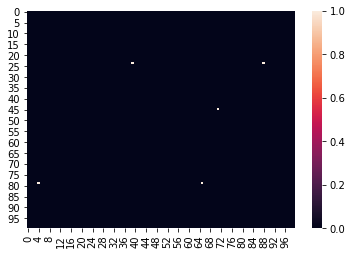

In [7]:
ax = sns.heatmap(Petri)

Definimmos un contador de teimpo, y listas para guardar los datos de cada ciclo del código. 
Cad ciclo equivale a un minuto.

* t : Timepo 
* T : Lista con valores de tiempo
* S : Lista con los valores de la cantidad de susutrato para cada tiempo.
* N : Lista con los valores de cantidad de bacterias para daca tiepo

In [8]:
t = 0
T = [] #El tiempo en minutos
S = []
N = [] #El número de células en el cultivo

In [12]:
while t<500:
#while Sustrato>0: 
    n = cel.Neubauer(Petri,1) # La función Neubaur cuneta el número de casillas que tienen cierto valor 
    T.append(t)
    N.append(n)
    S.append(Sustrato)
    for x in range(len(Counters)):
        for y in range(len(Counters)): #El doble for recorrerá todas las entradas de la matriz
            if Petri[x,y] == 1: #Si hay una célula viva, entonces ...
                Counters[x,y] = Counters[x,y] + 1 #A esa célula vuelvela un minuto más vieja
                
                if Counters[x,y] == 5 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    #Necrosis: Muerte celular
                    apop = rd.randint(1,1000)
                    if apop in range(999,1000): #A los cinco minutos tienen una probabilidad de morir
                        Petri[x,y] = 0
                        Counters[x,y] = 0
                        
                elif Counters[x,y] == 10 and Sustrato > 0: 
                    #Se alimenta
                    Sustrato = Sustrato - 1
                
                elif Counters[x,y] == 15 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    #NEcrosis
                    apop = rd.randint(1,1000)  #A los cinco minutos tienen una probabilidad de morir
                    if apop in range(999,1000):
                        Petri[x,y] = 0
                        Counters[x,y] = 0
                
                #Mitosis
                elif Counters[x,y] == 20 and Sustrato > 0: #Pasados veinte minutos tienen una oportunidad de replicarse 
                    prolif = rd.randint(1,100)
                    if prolif in range(1,91): #Si tienen la oportunidad...
                        Sustrato = Sustrato - 1  #Come susutrato
                        Petri[x,y] = 0 #Muere
                        Counters[x,y] = 0
                        cel.Mitosis(x,y,Petri,1,2) #Se divide, dos números ocuparan aleatoriamente un lugar un espacio alrededor de la casilla original
                        #Se invoca a funcion mitosis
                    else:
                        Petri[x,y] = 0
                        Counters[x,y] = 0
                        
                #elif Counters[x,y] == 60 and Sustrato == 0:
                    #Petri[x,y] = 0
                    #Counters[x,y] = 0  #Quitar comentario si se quiere ver muerte celular 
    
    t += 1
    

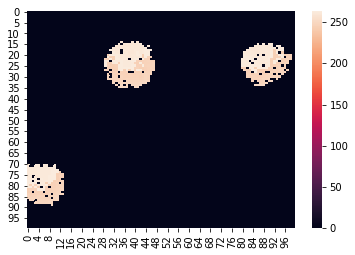

In [13]:
ax = sns.heatmap(Counters)

Text(0, 0.5, 'No. de células')

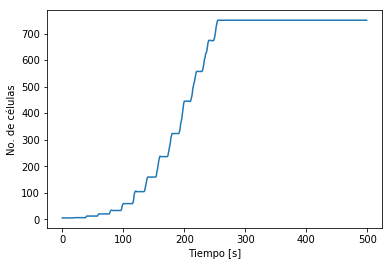

In [15]:
plot(T,N)
xlabel("Tiempo [s]")
ylabel("No. de células")

Text(0, 0.5, 'Cantidad de sustrato')

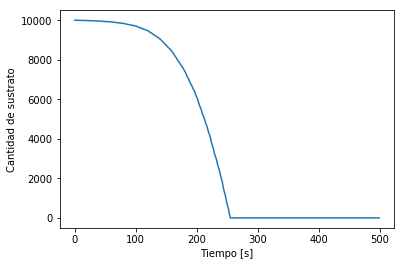

In [16]:
plot(T,S)
xlabel("Tiempo [s]")
ylabel("Cantidad de sustrato")

### Cultivo de hongos 

Se realiza mismo procedimiento que con las células de cancer

In [17]:
Petri2 = np.zeros((200,200), dtype = int)
Counters = np.zeros((200,200), dtype = int)
Sustrato = 5000

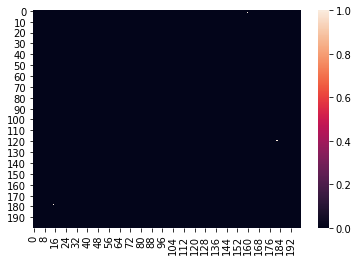

In [18]:
cel.plant_rand(Petri2,3,1)
ax = sns.heatmap(Petri2)

In [19]:
t = 0
T2 = [] #El tiempo en minutos
S2 = []
N2 = [] #El número de células en el cultivo

In [20]:

while Sustrato>0: 
    n = cel.Neubauer(Petri2,1)
    T2.append(t)
    N2.append(n)
    S2.append(Sustrato)
    for x in range(len(Counters)):
        for y in range(len(Counters)):
            if Petri2[x,y] == 1: #Si la célula está viva
                Counters[x,y] = Counters[x,y] + 1 #Se hace un minuto más vieja
                try:
                    cel.Gemaject(x,y,Counters,Petri2,10) #Si el hongo está pegado a una célula más grande y tiene diez ciclos de vida, despegala.
                except:
                    x > size(Petri2)-5 or y > size(Petri2)-5 #Excepto si está uy cerca de la orilla, no tiene espacio
                    pass
                
                if Counters[x,y] == 5 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    #Apoptosis
                    apop = rd.randint(1,1000)
                    if apop in range(999,1000):
                        Petri2[x,y] = 0
                        Counters[x,y] = 0
                        
                elif Counters[x,y] == 10 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    
                elif Counters[x,y] == 20 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    
                elif Counters[x,y] == 25 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    #Muerte celular espontanea
                    apop = rd.randint(1,1000)
                    if apop in range(999,1000):
                        Petri2[x,y] = 0
                        Counters[x,y] = 0
                
                elif Counters[x,y] == 30 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                
                elif Counters[x,y] == 40 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    
                #Gemación
                elif Counters[x,y] == 50 and Sustrato > 0: #Si se vuelve lo suficientemente vieja, que haga gemación
                    cel.Gema(x,y,Petri2,1)
                        #DE ella va a sar otro hongo a manera de chipote, despues de va a adespegar
                        #Añade una casilla arriba, abajo o la los costados de otra de manera aleatoria. 
                
                elif Counters[x,y] == 60 and Sustrato > 0:
                    Sustrato = Sustrato - 1
                    
                elif Counters[x,y] == 70 and Sustrato > 0:
                    cel.Gema(x,y,Petri2,1)
                        #Vuelve a gemar a los 70 ciclos de vida
                        
                elif Counters[x,y] == 80 and Sustrato > 0:
                    Petri2[x,y] = 0
                    Counters[x,y] = 0 #Si es muy vieja, muere
                    
    t += 1
    

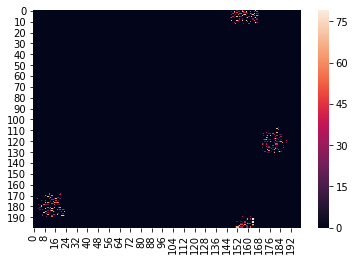

In [21]:
sns.heatmap(Counters)

Text(0, 0.5, 'No. de Hongos')

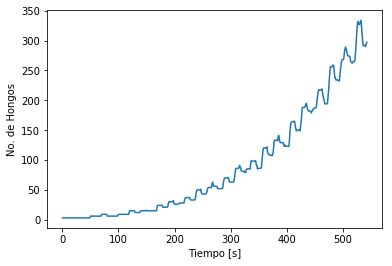

In [22]:
plot(T2,N2)
xlabel("Tiempo [s]")
ylabel("No. de Hongos")

Text(0, 0.5, 'Cantidad de sustrato')

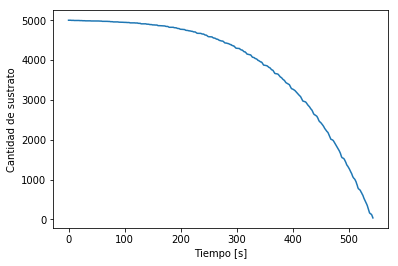

In [23]:
plot(T2,S2)
xlabel("Tiempo [s]")
ylabel("Cantidad de sustrato")

### Modelo de Monod

Modela el crecimiento de una población de bacterias cuya proliferación depende la una cantidad de susutrato, pueda ser alimento o algun veneno que incrememtne con el tiempo. Su velocidad de replicación $\mu$ depende de la cantidad de susutrato y está definidad por la ecuación de Monod.

$$\mu(S)=\dfrac{\mu_{max}S}{K_S+S}$$

Para realizar el modelo necesitamos obtener ciertos parámetros de la ecuacion de Monod.

* Veocidad máxima $\mu_{max}$: Con los valores de población podemos obtener por regreción lineal una ecuación que se ajuste a los datos, al derivarla respecto del timpo obtendremos la velocidad de replicación, el valor más alto será la velocidad máxima.

* Constante de utilización del sustrato limitante $K_{s}$:representa la afinidad de los organismos por ese sustrato. La constante Ks es la concentración del sustrato a la que se producen microorganismos con una velocidad igual a la mitad de la velocidad específica de crecimiento m´aximo. Si el organismo tiene gran afinidad por el sustrato limitante, el valor de Ks sera mayor.

* Constante de rendimiento $Y$: Cantidad de biomasa entre cantidad de susutrato

Ahora realizando un ajuste exponencial de los datos:
Recordando que se hace el ajuste lineal $N=mT+b$ se tiene que $e^{N}=e^{mT}e^{b}$ donde m y b son los siguientes:
$$m=\dfrac{n \sum_{i=1}^n (T_iN_i)-\sum_{i=1}^n T_i \sum_{i=1}^n N_i}{n \sum_{i=1}^n T_i^2 - (\sum_{i=1}^n T_i)^2}$$


$$b=\dfrac{\sum_{i=1}^n T_i^2\sum_{i=1}^nṆ_i-\sum_{i=1}^n T_i\sum_{i=1}^n (T_iN_i)}{n \sum_{i=1}^n T_i^2 - (\sum_{i=1}^n T_i)^2}$$

In [50]:
n=len(N)
nu=np.array(N)
tao=np.array(T)
jumN=sum(nu)
jumT=sum(tao)
jumNT=sum(tao*nu)
jumT2=sum(tao*tao)


In [51]:
m=(n*jumNT-jumT*jumN)/(n*jumT2-jumT**2)
b=(jumT2*jumN-jumT*jumNT)/(n*jumT2-jumT**2)

C:\Users\victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.
C:\Users\victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in long_scalars
  


In [52]:
#Esta funcion aplica el ajuste lineal a cada elemnto de la lista
def linearT(lista):
    K=[]
    for j in lista: #A cada elemnto de la lista multiplicalo por la pendiente y sumale la ordenada al origen
        R=(m*j)+b
        K.append(R)
    return K #Mete cada uno de estos nuevos elementos en una nueva lista 

Para el ajuste exponencial consederamos la ecuación $log{N}=mT+b$ y la transformamos en $N=e^{mT}e^{b}$

Para  $log{N}=mT+b$

In [53]:
#Función que devuelve el logaritmo del ajuste lineal a cada elemento 
def logaritmicalT(lista):
    L=[]
    for i in lista:
        g=log(m*i+b)
        L.append(g)
    return L

In [54]:
def logaritmicalN(lista):
    M=[]
    for i in lista:
        h=log(i)#Regresa el logaritmo de cada elemento de la lista y agragalo a una nueva lista vacia
        M.append(h)
    return M

C:\Users\victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


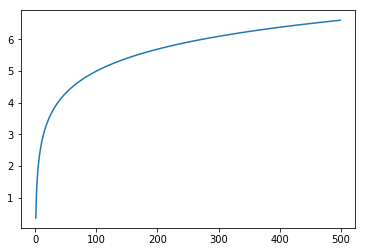

In [55]:
plot(T,logaritmicalT(T))

Para $N=e^{mT}e^{b}$

In [56]:
def exponentialT(lista):
    J=[]
    for i in lista:
        F=exp((m*i)+b)#Devuelve la exponencial del ajuste lineal de cada elemento de la lista
        J.append(F)
    return J

In [57]:
def exponentialN(lista):
    J=[]
    for i in lista:
        F=exp(i)#Devuelve la exponencial de cada elemento de la lista
        J.append(F)
    return J

In [58]:
plot(exponentialT(T),exponentialN(N))

C:\Users\victor\Anaconda3\lib\site-packages\matplotlib\ticker.py:1943: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
C:\Users\victor\Anaconda3\lib\site-packages\matplotlib\ticker.py:1975: RuntimeWarning: overflow encountered in double_scalars
  high = edge.ge(_vmax - best_vmin)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000000AD7ECFBD08> (for post_execute):


ValueError: arange: cannot compute length

ValueError: arange: cannot compute length

In [59]:
def pendiente(lista):
    Y=[]
    for i in lista:
        S=(m*i)+b
        Y.append(S)
    return Y

##### Parametros de Monod


Apartir de la ecuación de Monod:
$$\left\{ \begin{array}{rc1}
    \dfrac{dN(t)}{dt}=\mu (S)N(T)
    \\ \dfrac{dS(t)}{dt}=\dfrac{-1}{Y} \dfrac{dN(t)}{dt}
\end{array} \right.$$

De acuerdo a la literatura consultada, el inverso de la gráfica de velocidad se puede linealizar de la siguiente manera (ecuación de Lineweaver-Burk):

$$\dfrac{1}{\mu (S)} = \dfrac{K_S}{\mu_{max}} \dfrac{1}{S}+ \dfrac{1}{\mu_{max}}$$

$$\mu(S)=\dfrac{\mu_{max}S}{K_S+S}$$

Dónde $\mu (S)$ es la velocidad de aumento de crecimiento celular por unidad de tiempo, $\mu_{max}$ la velocidad especifica de crecimiento y $K_S$ la concentración de sustrato a la que se prduce una mayor cantidad de organismos. Gracias a la regresión lineal realizada anteriormente es posible determinar los valores $\mu_{max}$, $\mu (S)$ y $K_S$, mediante las siguientes relaciones:

$$m=\dfrac{K_S}{\mu_{max}}\;\ b=\dfrac{1}{\mu_{max}}$$

Asi mismo se puede rescatar del ajuste lineal las siguientes relaciones:

$$S=log(mT+b) \Rightarrow  V_S= \dfrac{m}{mT+b}$$

$$N=e^be^{mT} \Rightarrow  V_N=me^be^{mT}$$

In [60]:
#Funcion que devuelve la derivada(velocidad) de la cantidad de sustrato y la coloca en una lista nueva
def V_S(lista):
    R=[]
    for i in lista:
        T= m/(m*i + b)
        R.append(T)
    return R

In [61]:
#Funcion que devuelve la derivada(velocidad) de la cantidad de biomasa y la coloca en una lista nueva
def V_N(lista):
    R=[]
    for i in lista:
        T= m*40*exp(m*i)
        R.append(T)
    return R
    

Debido a que la velocidad de numero de bacterias diverge, se considera solamente la velocidad debida a la cantidad de sustrato.

Text(0.5, 1.0, 'Velocidad de sustrato contra tiempo')

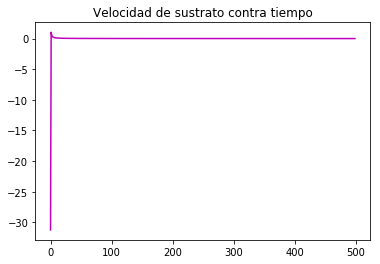

In [62]:
plt.plot(T,V_S(T),color='m')
title ("Velocidad de sustrato contra tiempo")

In [63]:
MaxS=max(V_S(T)) #Velocidad de sustrato máxima

De la ecuación de Monod  se tienen las siguientes relaciones:
$$\begin{equation}
    V_S=\dfrac{1}{Y}\mu (t)
\end{equation}$$

Dónde $Y=\dfrac{N}{S}$. Para determinar el parametro Y tomamos el promedio de la lista N (cantidad de bacterias) y la lista S (cantidad de sustratro), es decir:
$$\langle{Y}\rangle=\dfrac{\langle{N}\rangle}{\langle{S}\rangle}$$

In [64]:
#Funciom que devuelve el promedio de los elementos de una lista
def promedio(lista):
    M= array(lista)
    Z=sum(M)/len(lista)
    return Z

In [65]:
#Y_S promedio
Y_S=promedio(N)/promedio(S)
Y_S

0.4512836132625533

In [66]:
Mu_Maxima=Y_S*MaxS

In [67]:
#Mu maxima promedio
Mu_Maxima

0.4662076541270869

In [68]:
#K_S promedio
K_S=m*Mu_Maxima

In [69]:
K_S

0.692223486898346

In [70]:
#Funcioń que hace el ajuste de velocidad a cada elemento de una losta
def mu_S(lista):
    J=[]
    for i in lista:
        G=(Mu_Maxima*i)/(K_S+i)
        J.append(G)
    return J

Text(0.5, 1.0, 'Sustrato contra Velocidad de sustrato')

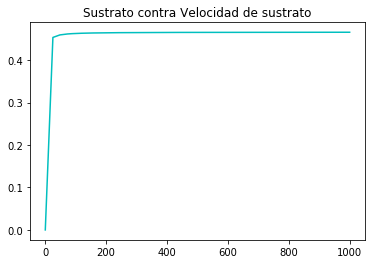

In [71]:
plt.plot(S,mu_S(S),color='c')
title("Sustrato contra Velocidad de sustrato")

In [72]:
# Ajuste lineal obtenido de la ecuación de Monod
def mu_Sinv(lista):
    T=[]
    for j in lista:
        S= (K_S/j*Mu_Maxima)+(1/Mu_Maxima)
        T.append(S)
    return T

In [73]:
#Función que calcula el inverso de cada elemnto de una lista y lo guarda en otra lista
def inv(lista):
    J=[]
    for i in lista:
        r=1/i
        J.append(r)
    return J

In [74]:
plt.plot(inv(S),mu_Sinv(S),color='r')
title("Inverso de sustrato contra inverso de velocidad")

ZeroDivisionError: division by zero

In [75]:
#Mu maxima, Y y K_S
(Mu_Maxima,Y_S,K_S)

(0.4662076541270869, 0.4512836132625533, 0.692223486898346)

Una vez obtenidos los parámetros, susutituirlos en uns función de odeint para si la predicción se cumple

In [76]:
def Monod(L,t,mumax,Y,Ks):
    return np.array([(mumax*L[1]*L[0])/(Ks + L[1]), (-mumax*L[1]*L[0])/((Ks + L[1])*Y)])

In [83]:
t = np.linspace(0,500,500)
out = scy.odeint(Monod, [2.0, 1000.0], t, args=(0.4662076541270869, 0.4512836132625533, 0.692223486898346,))

Text(0.5, 1.0, 'Poblacion respecto del timepo')

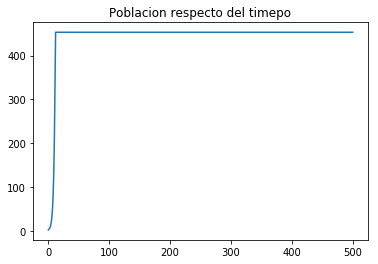

In [84]:
plot(t,out[:,0])
title('Poblacion respecto del timepo')

### Competencia (A ver, peleén :v)

In [106]:
PetriC = np.zeros((100,100), dtype = int)
Counters = np.zeros((100,100), dtype = int)
Sustrato = 1000

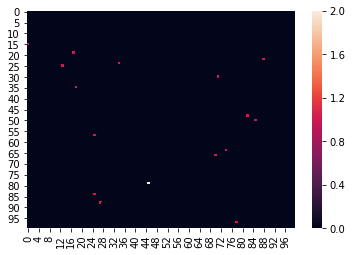

In [107]:
cel.plant_rand(PetriC,15,1) #Plantar células cancerigenas, valor 1
cel.plant_rand(PetriC,1,2) #Plantar Hongo, valor 2
ax = sns.heatmap(PetriC)

In [108]:
t = 0
T3 = [] #El tiempo en minutos
S3 = []
Nb = []
Nh = []#El número de células en el cultivo

In [109]:
while Sustrato>0: 
    nb = cel.Neubauer(PetriC,1)
    nh = cel.Neubauer(PetriC,2)
    T3.append(t)
    Nb.append(nb)
    Nh.append(nh)
    S3.append(Sustrato)
    for x in range(len(Counters)):
        for y in range(len(Counters)):
            if PetriC[x,y] == 1:
                Counters[x,y] = Counters[x,y] + 1
                
                if Counters[x,y] == 5 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    #Apoptosis
                    apop = rd.randint(1,1000)
                    if apop in range(999,1000):
                        PetriC[x,y] = 0
                        Counters[x,y] = 0
                        
                elif Counters[x,y] == 10 and Sustrato > 0: 
                    #Se alimenta
                    Sustrato = Sustrato - 1
                
                elif Counters[x,y] == 15 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    #Apoptosis
                    apop = rd.randint(1,1000)
                    if apop in range(999,1000):
                        PetriC[x,y] = 0
                        Counters[x,y] = 0
                
                #Mitosis
                elif Counters[x,y] == 20 and Sustrato > 0:
                    prolif = rd.randint(1,100)
                    if prolif in range(1,91):
                        Sustrato = Sustrato - 1
                        PetriC[x,y] = 0
                        Counters[x,y] = 0
                        cel.Mitosis(x,y,Petri,1,2)
                        #Se invoca a funcion mitosis
                    else:
                        PetriC[x,y] = 0
                        Counters[x,y] = 0
    
            #Las células crecen como lo hacían anteririormente
            
            elif PetriC[x,y] == 2:
                
                Counters[x,y] = Counters[x,y] + 1
                try:
                    cel.Gemaject(x,y,Counters,PetriC,10)
                    sen = cel.sensor(x,y,PetriC,1) #Ademas de gemar y desplazarse, la función se da un valor True si la celula tienen alguna a lado de un tipo especifico.
                except:
                    x > size(PetriC)-5 or y > size(PetriC)-5
                    pass
                
                if Counters[x,y] == 5 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    #Apoptosis
                    apop = rd.randint(1,1000)
                    if apop in range(999,1000):
                        PetriC[x,y] = 0
                        Counters[x,y] = 0
                        
                elif Counters[x,y] == 10 :
                    #Se alimenta
                    if Sustrato > 0:
                        Sustrato = Sustrato - 1
                    elif sen == True:
                        cel.citoeat(x,y,PetriC,Counters,1) #Citoeat eliminia una casilla que el hongo tenga a lado.
                #Si se cabab el susutrato, puede comer célula en su lugar 
                elif Counters[x,y] == 20 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    
                elif Counters[x,y] == 25 :
                    #Se alimenta
                    if Sustrato > 0:
                        Sustrato = Sustrato - 1
                    elif sen == True:
                        cel.citoeat(x,y,PetriC,Counters,1)
                
                elif Counters[x,y] == 30 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                
                elif Counters[x,y] == 40 and Sustrato > 0:
                    #Se alimenta
                    Sustrato = Sustrato - 1
                    
                #Gemación
                elif Counters[x,y] == 50:
                    if  Sustrato > 0:
                        cel.Gema(x,y,PetriC,2)
                    elif sen == True:
                        citoeat(x,y,PetriC,Counters,2)
                        cel.Gema(x,y,PetriC,2)
                    else:
                        None
                
                elif Counters[x,y] == 60 and Sustrato > 0:
                    Sustrato = Sustrato - 1
                    
                elif Counters[x,y] == 70:
                    if Sustrato > 0:
                        cel.Gema(x,y,PetriC,2)
                    elif sen == True:
                        cel.citoeat(x,y,PetriC,Counters,2)
                        cel.Gema(x,y,PetriC,2)
                    else:
                        None
                        
                elif Counters[x,y] == 80 and Sustrato > 0:
                    Petri2[x,y] = 0
                    Counters[x,y] = 0
                    
    t += 1

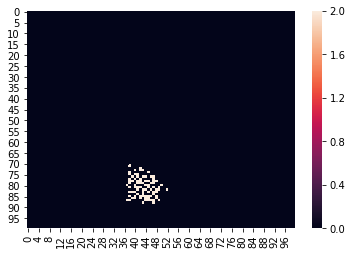

In [110]:
sns.heatmap(PetriC)

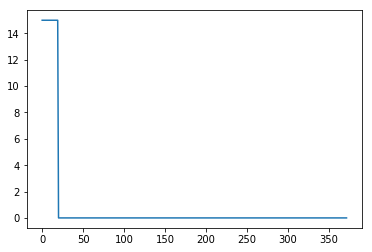

In [111]:
plot(T3,Nb)